# Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.  
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Attribute Information
1) id: unique identifier  
2) gender: "Male", "Female" or "Other"  
3) age: age of the patient  
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease  
6) ever_married: "No" or "Yes"  
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"  
8) residence_type: "Rural" or "Urban"  
9) avg_glucose_level: average glucose level in blood  
10) bmi: body mass index  
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*  
12) stroke: 1 if the patient had a stroke or 0 if not  

 **Note: "Unknown" in smoking_status means that the information is unavailable for this patient**

In [1]:
# standard
import numpy as np
import pandas as pd

# plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 379.3+ KB


I can see that there are mainly three things to cleanse from the data information.
1. There are missing values and unknown values for bmi and smoking_status.
2. 'Residence_type' should be edited to 'residence_type'.
3. There is a unnecessary column so I'm going to remove the 'id' column. 

In [5]:
# Filling the average values of bmi into the missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Rename columns
df.rename(columns = {'Residence_type':'residence_type'}, inplace = True)

# Remove the id column
data = df.drop('id', axis=1)


In [6]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [7]:
# Make sure there's no missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 339.4+ KB


In [8]:
# Check the unique values to draw graphs

unique_features = ['gender', 'hypertension', 'heart_disease','ever_married', 'work_type', 'residence_type', 'smoking_status']
for unique_feature in unique_features:
    print(data[unique_feature].unique())

['Male' 'Female' 'Other']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


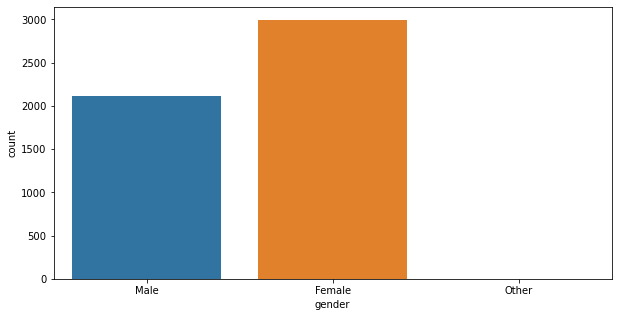

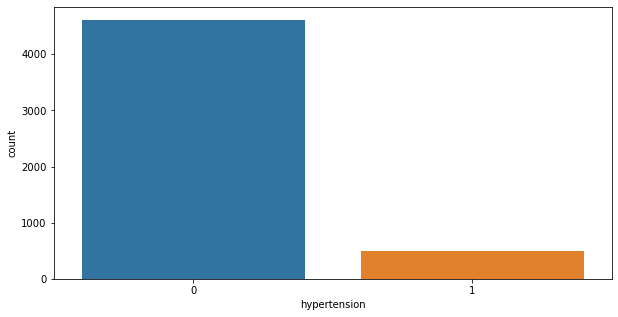

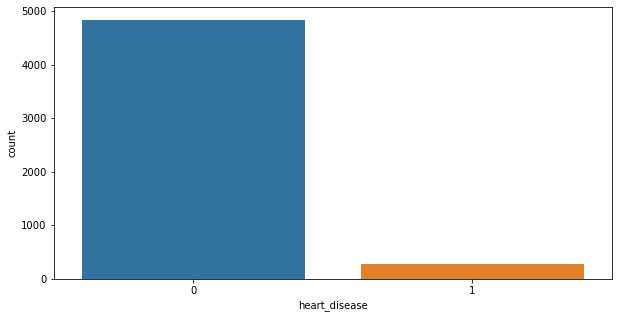

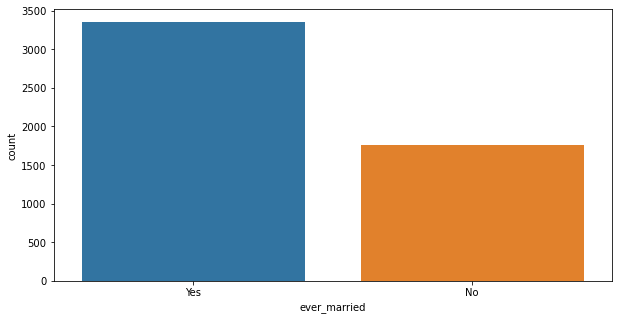

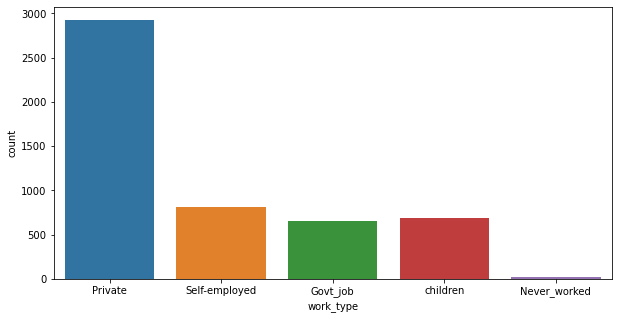

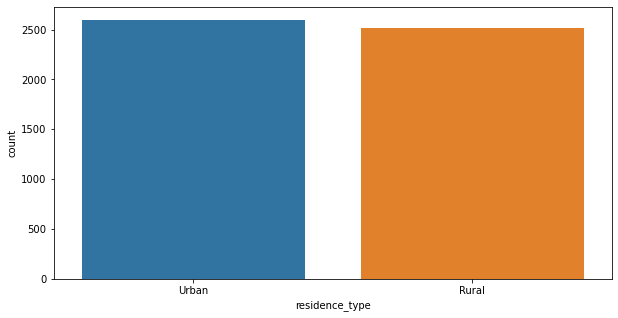

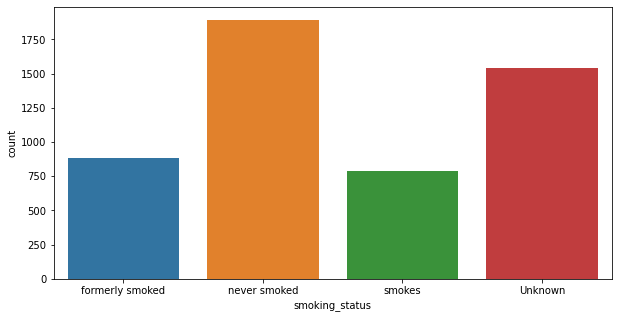

In [9]:
# Plot graphs

for unique_feature in unique_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x = data[unique_feature])
    plt.show()

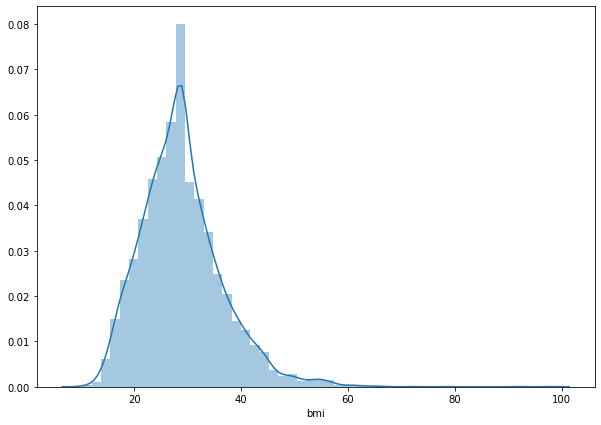

In [10]:
# Draw BMI graph

plt.figure(figsize=(10,7))
sns.distplot(data["bmi"])
plt.show()

In [11]:
# Use One-hot encoding to the columns.
data = pd.get_dummies(data=data, columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'])
data

,stroke,gender_Female,gender_Male,gender_Other,age_0.08,age_0.16,age_0.24,age_0.32,age_0.4,age_0.48,...,bmi_64.8,bmi_66.8,bmi_71.9,bmi_78.0,bmi_92.0,bmi_97.6,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5106,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5107,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5108,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Feature Selection

y = data['stroke']
X = data.drop('stroke', axis = 1)

In [37]:
# Splitting test and train set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [38]:
y_test_predict = linear_regression_model.predict(X_test)

In [39]:
# Training model using RandomForestClassifier.

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The Training Score of RandomForestClassifier is: {:.3f}%".format(model_rf.score(X_train, y_train)*100))
print("\n----------------------------------------------------------------------\n")
print("The Confusion Matrix for RandomForestClassifier is: \n{}\n".format(confusion_matrix(y_test, y_pred)))
print("\n----------------------------------------------------------------------\n")
print("The Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
print("\n----------------------------------------------------------------------\n") 
print("The Accuracy Score of RandomForestClassifier is: {:.3f}%".format(accuracy_score(y_test, y_pred)*100))

The Training Score of RandomForestClassifier is: 99.971%

----------------------------------------------------------------------

The Confusion Matrix for RandomForestClassifier is: 
[[1605    0]
 [  82    0]]


----------------------------------------------------------------------

The Classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1605
           1       0.00      0.00      0.00        82

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.91      0.95      0.93      1687



----------------------------------------------------------------------

The Accuracy Score of RandomForestClassifier is: 95.139%


C:\Users\jaewo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='saga', max_iter=2000)


In [50]:
from sklearn.model_selection import cross_val_score

k_fold_score = np.average(cross_val_score(logistic_model, X, y, cv=5))
k_fold_score

print("The Accuracy Score of K-Layer Cross-Validation is: {:.1f}%".format(k_fold_score))

The Accuracy Score of K-Layer Cross-Validation is: 0.950%
